In [ ]:
import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:35<00:00, 81.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
os.listdir(path+"/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train")

['Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Grape___Esca_(Black_Measles)',
 'Strawberry___Leaf_scorch',
 'Grape___healthy',
 'Apple___Black_rot',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Potato___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Strawberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Pepper,_bell___healthy',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Squash___Powdery_mildew',
 'Tomato___Bacterial_spot',
 'Tomato___healthy',
 'Peach___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Potato___Late_blight',
 'Blueberry___healthy',
 'Tomato___Leaf_Mold',
 'Cherry_(including_sour)___Powdery_mildew',
 'Soybean___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Potato___Early_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Tomato___Early_blight',
 'Peach___Bacterial_spot',
 'Raspberry___healthy

### Visualizing the directory

In [ ]:
os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")

['Apple___healthy',
 'Tomato___Bacterial_spot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Apple___Apple_scab',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy',
 'Tomato___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Strawberry___healthy',
 'Soybean___healthy',
 'Tomato___Leaf_Mold',
 'Grape___Black_rot',
 'Tomato___Late_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___Common_rust_',
 'Tomato___Target_Spot',
 'Blueberry___healthy',
 'Pepper,_bell___healthy',
 'Apple___Cedar_apple_rust',
 'Peach___Bacterial_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Early_blight',
 'Peach___healthy',
 'Tomato___Tomato_mosaic_virus',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Squa

In [ ]:
diseased_images_list=os.listdir('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')
print(len(diseased_images_list))
diseased_images_list[:10]


38


['Apple___healthy',
 'Tomato___Bacterial_spot',
 'Cherry_(including_sour)___Powdery_mildew',
 'Apple___Apple_scab',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy',
 'Tomato___healthy',
 'Pepper,_bell___Bacterial_spot']

In [ ]:
healthy_images_list=os.listdir('./drive/MyDrive/dataset/train/healthy')
print(len(healthy_images_list))
healthy_images_list[:10]


904


['281.jpg',
 '270.jpg',
 '240.jpg',
 '80.jpg',
 '488.jpg',
 '259.jpg',
 '158.jpg',
 '360.jpg',
 '442.jpg',
 '772.jpg']

## Visualzing images

In [ ]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
diseased_image=cv.imread('./drive/MyDrive/dataset/train/diseased/9.jpg')
print(diseased_image.shape)
print(diseased_image[0:3,0:3,:])

(256, 256, 3)
[[[106  87 104]
  [ 90  71  88]
  [ 90  71  88]]

 [[147 128 145]
  [ 87  68  85]
  [126 107 124]]

 [[106  87 104]
  [ 85  66  83]
  [ 95  76  93]]]


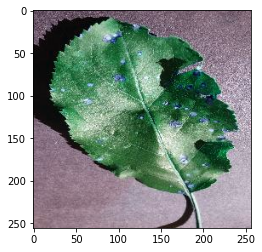

In [ ]:
plt.imshow(diseased_image)

In [ ]:
healthy_image=cv.imread('./drive/MyDrive/dataset/train/healthy/10.jpg')
print(healthy_image.shape)
print(healthy_image[0:3,0:3,:])

(256, 256, 3)
[[[139 121 120]
  [139 121 120]
  [137 119 118]]

 [[138 120 119]
  [138 120 119]
  [138 120 119]]

 [[136 118 117]
  [136 118 117]
  [137 119 118]]]


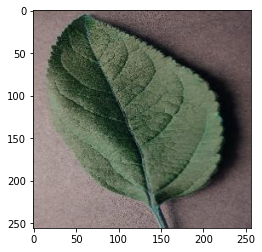

In [ ]:
plt.imshow(healthy_image)

## Visualzing different filters on images in order to seprate it from background

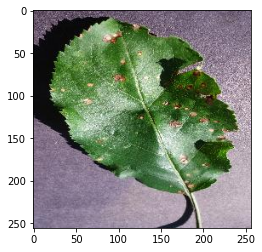

In [ ]:
def bgr_to_rgb(image):
    rgb_img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return rgb_img


rgb_img=bgr_to_rgb(diseased_image)
plt.imshow(rgb_img)

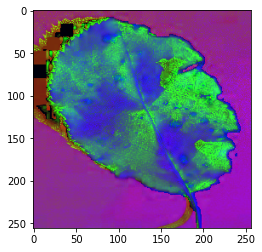

In [ ]:
def bgr_to_hsv(image):
    hsv_img=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_img


hsv_img=bgr_to_hsv(diseased_image)
plt.imshow(hsv_img)

## Making green/healthy mask for the image

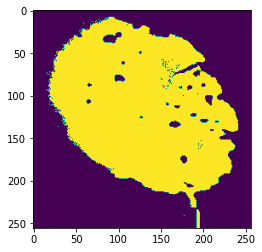

In [ ]:
lower_green = np.array([25,0,20])
upper_green = np.array([100,255,255])
hsv_img=bgr_to_hsv(diseased_image)
healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
plt.imshow(healthy_mask)

## Applying the mask to the image

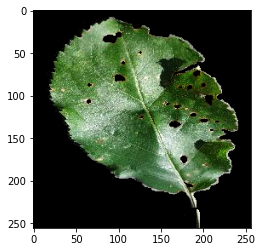

In [ ]:
rbg_image=bgr_to_rgb(diseased_image)
green_mask_applied_image = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
plt.imshow(green_mask_applied_image)

## Making brown/diseased mask for the image

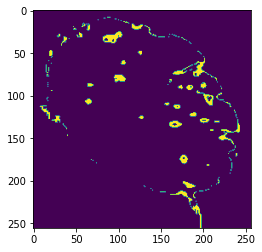

In [ ]:
lower_brown = np.array([10,0,10])
upper_brown = np.array([30,255,255])
hsv_img=bgr_to_hsv(diseased_image)
diseased_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
plt.imshow(diseased_mask)

## Applying the mask to the image

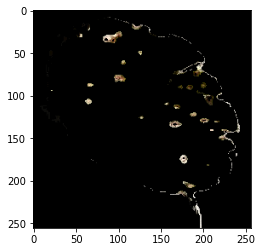

In [ ]:
rbg_image=bgr_to_rgb(diseased_image)
brown_mask_applied_image = cv2.bitwise_and(rgb_img,rgb_img, mask=diseased_mask)
plt.imshow(brown_mask_applied_image)

## Combining both the masks for the final result

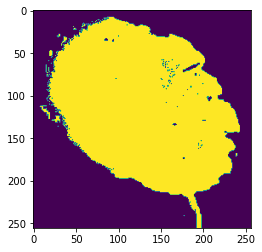

In [ ]:
final_mask=healthy_mask+diseased_mask
plt.imshow(final_mask)

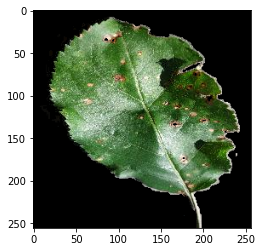

In [ ]:
final_result=cv2.bitwise_and(rgb_img,rgb_img, mask=final_mask)
plt.imshow(final_result)

## Combining all the filters into on final function such that it is easy to use

### In image segentation we first used green filter to extract health part of the leaf and then we used brown filter to extract diseased part of the leaves then we combined both masks and applied the final filter to image to seperate it from the background.

In [ ]:

def img_segmentation(rgb_img,hsv_img):
    lower_green = np.array([25,0,20])
    upper_green = np.array([100,255,255])
    healthy_mask = cv2.inRange(hsv_img, lower_green, upper_green)
    result = cv2.bitwise_and(rgb_img,rgb_img, mask=healthy_mask)
    lower_brown = np.array([10,0,10])
    upper_brown = np.array([30,255,255])
    disease_mask = cv2.inRange(hsv_img, lower_brown, upper_brown)
    disease_result = cv2.bitwise_and(rgb_img, rgb_img, mask=disease_mask)
    final_mask = healthy_mask + disease_mask
    final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
    return final_result


## Image moment and HU moment feature extrection

In [ ]:
def feature_extraction_image_moment(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

rgb_img=bgr_to_rgb(diseased_image)
hsv_img=bgr_to_hsv(diseased_image)
image=img_segmentation(rgb_img,hsv_img)

feature=feature_extraction_image_moment(image)
feature


array([1.51443769e-03, 3.50007184e-07, 7.04448203e-11, 2.74046233e-11,
       4.39416267e-22, 1.26319618e-14, 1.12105085e-21])

### Feature extraction using haralick

#### Haralick texture features are calculated from a Gray Level Co-occurrence Matrix, (GLCM), a matrix that counts the co-occurrence of neighboring gray levels in the image. The GLCM is a square matrix that has the dimension of the number of gray levels N in the region of interest (ROI).

In [ ]:
pip install mahotas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 32.2 MB/s 


In [ ]:
import mahotas

In [ ]:
def feature_extraction_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

rgb_img=bgr_to_rgb(diseased_image)
hsv_img=bgr_to_hsv(diseased_image)
image=img_segmentation(rgb_img,hsv_img)

haralick=feature_extraction_haralick(image)
haralick




array([ 2.34172568e-01,  8.11643394e+02,  9.09627281e-01,  4.49028912e+03,
        5.11347949e-01,  1.11685201e+02,  1.71495131e+04,  5.46853458e+00,
        8.27126816e+00,  9.60778948e-04,  4.11898142e+00, -3.13268645e-01,
        9.76526998e-01])

### Feature exraction using histlogram of the image
#### Histogram shows the pixel intensity and freuency of that intensity of pixels

(512,)


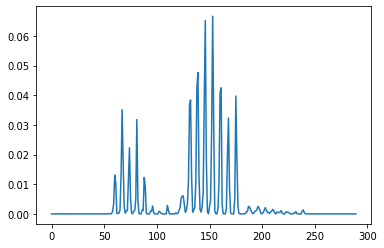

In [ ]:
def feature_extraction__histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    bins=8
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

rgb_img=bgr_to_rgb(diseased_image)
hsv_img=bgr_to_hsv(diseased_image)
image=img_segmentation(rgb_img,hsv_img)

fv_histogram=feature_extraction__histogram(image)
print(fv_histogram.shape)
plt.plot(fv_histogram[10:300])

In [ ]:
for label in os.listdir('./drive/MyDrive/dataset/train'):
  print(label)

healthy
diseased


### With help of the afore mentioned functions images are converted to feature vectors


In [ ]:
labels=[]
global_features=[]
fixed_size=tuple((500, 500))
for label in os.listdir('./drive/MyDrive/dataset/train'):
  for x in os.listdir("./drive/MyDrive/dataset/train/"+str(label)):
        image = cv2.imread('./drive/MyDrive/dataset/train/'+str(label)+'/'+str(x))
        image = cv2.resize(image, fixed_size)
        RGB_BGR       = bgr_to_rgb(image)
        BGR_HSV       = bgr_to_hsv(RGB_BGR)
        IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)


        fv_hu_moments = feature_extraction_image_moment(IMG_SEGMENT)
        fv_haralick   = feature_extraction_haralick(IMG_SEGMENT)
        fv_histogram  = feature_extraction__histogram(IMG_SEGMENT)


        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])



        labels.append(str(label))
        global_features.append(global_feature)


In [ ]:
global_features=np.array(global_features)
global_features.shape

(1709, 532)

In [ ]:
labels=np.array(labels)
labels.shape

(1709,)

### Label encoding of output and feature scaling of input

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)

### Train test split of gloabal feature data

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train,X_test, y_train, y_test = train_test_split(rescaled_features, target, test_size=0.2, random_state=42)

### Training Logistic regression model
### Prediciting the result
### Calculating classification report
### Making confusion matrix

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as  metrics
from sklearn.model_selection import  cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)


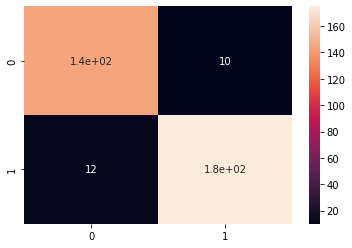

In [ ]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       155
           1       0.95      0.94      0.94       187

    accuracy                           0.94       342
   macro avg       0.93      0.94      0.94       342
weighted avg       0.94      0.94      0.94       342



In [ ]:
kfold = KFold(n_splits=10, random_state=9,shuffle=True)
cv_results = cross_val_score(LogisticRegression(), X_train, y_train, cv=kfold, scoring="accuracy")

In [ ]:
np.max(cv_results)

0.948905109489051

## All the models are added to the model list and then training all the models with 10-fold cross validation
## On reviewing the results of predicition,Random forest regressor achieves best accuraccy

[0.9270073  0.94890511 0.93430657 0.91240876 0.91970803 0.94890511
 0.94890511 0.93382353 0.91911765 0.91911765]
LR: 0.931220 (0.013235)
[0.90510949 0.94160584 0.91240876 0.91240876 0.91970803 0.9270073
 0.95620438 0.91176471 0.92647059 0.91911765]
LDA: 0.923181 (0.014741)
[0.93430657 0.93430657 0.94890511 0.89781022 0.94160584 0.96350365
 0.93430657 0.91911765 0.92647059 0.94852941]
KNN: 0.934886 (0.017152)
[0.91240876 0.9270073  0.90510949 0.89051095 0.90510949 0.90510949
 0.94160584 0.92647059 0.93382353 0.96323529]
CART: 0.921039 (0.020493)
[0.9270073  0.97810219 0.97080292 0.9270073  0.96350365 0.98540146
 0.98540146 0.97058824 0.93382353 0.97794118]
RF: 0.961958 (0.022372)
[0.84671533 0.86131387 0.81751825 0.88321168 0.81021898 0.88321168
 0.84671533 0.77205882 0.83823529 0.82352941]
NB: 0.838273 (0.032453)
[0.90510949 0.94890511 0.9270073  0.9270073  0.9270073  0.94890511
 0.94160584 0.93382353 0.91176471 0.90441176]
SVM: 0.927555 (0.015614)


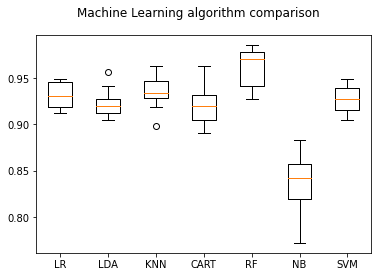

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.externals import joblib

models = []
seed=9
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

# variables to hold the results and names
results = []
names   = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


fig = plt.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [ ]:
clf  = RandomForestClassifier(n_estimators=100, random_state=seed)
clf.fit(X_train,y_train)

In [ ]:
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       155
           1       0.97      0.95      0.96       187

    accuracy                           0.96       342
   macro avg       0.96      0.96      0.96       342
weighted avg       0.96      0.96      0.96       342



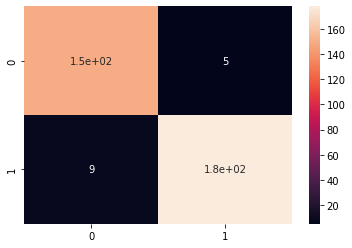

In [ ]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)
print(metrics.classification_report(y_test,y_pred))

# For testing purpose

In [ ]:
def feature_convertor(image_path):
  features=[]
  image=cv.imread(image_path)
  image = cv2.resize(image, fixed_size)
  RGB_BGR       = bgr_to_rgb(image)
  BGR_HSV       = bgr_to_hsv(RGB_BGR)
  IMG_SEGMENT   = img_segmentation(RGB_BGR,BGR_HSV)

  fv_hu_moments = feature_extraction_image_moment(IMG_SEGMENT)
  fv_haralick   = feature_extraction_haralick(IMG_SEGMENT)
  fv_histogram  = feature_extraction__histogram(IMG_SEGMENT)

  global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
  features.append(global_feature)

  return features






In [ ]:
def prediciton(image_path):
  features= feature_convertor(image_path)
  features=scaler.transform(features)
  pred=clf.predict(features)
  return pred[0]





In [ ]:
image_path='./drive/MyDrive/dataset/train/diseased/100.jpg'
prediciton(image_path)

0